Completely redesign and redo this test. In the current setup this test says little about the performance of LIVSIM compared with the data of Jenet _et al._ 2004.
- Parameterize breed + feed
- Create sets of parameters for the different simulations
- Run the experiments
- Check several aspect of the model vs. the data: feed intake, body weight, body weight change, milk production

# Model Test: Feeding Trials, Jenet et al., 2004.

# Introduction

In 2004 A. Jenet et alii published a paper titled

"Feeding level and dairy performance of Boran and Boran x Holstein" 

which investigates feed(-level) response of 24 Boran and 24 Boran x Holstein cattle.

Here we test LIVSIM by the LIVSIM simulation results to the corresponding experimental observations.

### Outline

Based on the paper we test whether LIVSIM reliably simulates a single cow.
 
    1. defining (parametrize) the feed
    
    then for both the high and medium feeding level we
    
    2. defining (parametrize) the Boran x Holstein cow    
    3. simulation of a single cow
    4. evalution of results

### Test pass/fail criteria

Our model succesfully passes the test if
    1. body weight prediction is reliable: predicted - observed <= 5%.
    2. likewise for milk production: milk volume, fat and protein yield.
    3. and feed intake
    
### References

Throughout this document we refer to a number of works as follows:

- [1] Jenet et al., 2004.
- [2] M.C. Rufino's thesis
- [3] AFRC 1993 manual

## Current Verdict: Test Passed --- under provision

The modelled body weight, the milk production, etc., match within 5% for the first cycle for both feeding levels. Only for the second cycle we find an apparent over-estimation of demands of lactation.

## Lessons learned

Here we can stress that (1) the modelled cow is very sensitive --- like a real cow --- to the level of feeding: 

a 1% change in the level of feeding translates into a 2--5% change in the magnitude of the body weight change during lactation!

It is thus important to have a good estimate of the level of feeding.

Accordingly, the typical experimental uncertainty in the level of feeding (2%) allows for sufficient, tempting "play-room" in getting agreement between model and observations.

Thus validation should be done with care: no cheating.

Furthermore (2) modelled demands of lactation seem slighly off for the high feeding level and second cycle.

Hypotheses: (a) Efficiency peaks in the second/third cycle, slightly lower in first.

### 1. Defining the feed

In the expirment, the cattle was given the same kind of feed throughout: a 65:35 mixture of bermuda grass hay and wheat bran.

Estimates of the associated feed quality parameters are given in table 1 of the paper.

Furthermore "the cattle had ad libitum access to licking blocks" --- no mention of the N content.

A priori, the ME content of the feed was estimated following the MAFF (1987).

These estimates were used to set the feed amount.

A posteriori, ME was estimated differently (no real reason mentioned).

The a priori the ME content turned out to be an under-estimate (!).

TLDR: The animals were fed more than initially planned... 

This has (!) to be taken into account to adequately simulate the experiment.

Note, the researches assume the protein supply to not be limiting which, according to our estimates, does require N intake from the licking block!


In [1]:
# Make LivSim source importable from this notebook
import sys
import yaml

from helpers import *

sys.path.append('../../../..')

from livsim import Cow
from livsim import Feed
from livsim import mix

%load_ext autoreload
%autoreload 2

# mean days per month
DPM = 30

In [17]:
# [1] Jenet et al., 2004.
# [2] M.C. Rufino's thesis
# [3] AFRC 1993 manual

bermuda_grass_parameters = yaml.load('''

    # Taken from [1] Table 1.

    ME: 7.5  # 9.6
    DM: 905
    CP: 45 # <---- Aart: a bit low
    NDF: 752
    GE: 17.4
    P: 2.0

    # Taken from [2] table A13
    DMD: 524.0
    a: 0.22
    b: 0.60
    c: 0.08

    # Not stated in [1] or [2]!
    # Note: MP value is (!) sensitive to the FME value and ADIN value.

    ADIN: 1. # [3] p. 48, Table 4.1

    # FME ~= ME

    FME: 9.6 #   [3] p. 50

    K: 0.017533

''', Loader=yaml.SafeLoader)

In [18]:
wheat_bran_parameters = yaml.load('''

    # Taken from [1] Table 1.

    ME: 10.1  #11
    DM: 890
    CP: 160
    NDF: 446
    GE: 17.9
    P: 7.2

    # Taken from [2] table A13
    DMD: 700
    a: 0.30
    b: 0.57
    c: 0.11

    # The following is not stated in [1] or [2] thus based on an external general source of information: [3]!
    # Note: MP value is (!) sensitive to the FME value and ADIN value.

    ADIN: 1. # [3] p. 48, Table 4.1

    # FME ~= ME

    FME: 11 #   [3] p. 50

    K: 0.017533

''', Loader=yaml.SafeLoader)

In [19]:
# grass:bran = 0.65:0.35

bermuda_grass = Feed(amount=.65)
bermuda_grass.set_parameters(bermuda_grass_parameters)

wheat_bran = Feed(amount=.35)
wheat_bran.set_parameters(wheat_bran_parameters)

print('Grass ME content (MJ/kg DM): \n\t{:<20}: {:<3.3f}\n\t{:<20}: {:<3.3f}\n\t{:<20}: {:<3.3f}\n'.format('in this test',
                                                                                                           bermuda_grass.ME,
                                                                             'paper, a priori', 7.5,
                                                                             'paper, a posteriori', 9.6
                                                                             ))

print('Bran ME content (MJ/kg DM): \n\t{:<20}: {:<3.3f}\n\t{:<20}: {:<3.3f}\n\t{:<20}: {:<3.3f}\n'.format('in this test',
                                                                                                          wheat_bran.ME,
                                                                             'paper, a priori', 10.1,
                                                                             'paper, a posteriori', 11.0
                                                                             ))

print('Grass MP content (g/kg DM): \n\tus   : {:<3.3f} \n\tpaper: {:<3}\n'.format(bermuda_grass.MP, '?'))
print('Bran MP content (g/kg DM): \n\tus   : {:<3.3f} \n\tpaper: {:<3}\n'.format(wheat_bran.MP, '?'))

Grass ME content (MJ/kg DM): 
	in this test        : 7.500
	paper, a priori     : 7.500
	paper, a posteriori : 9.600

Bran ME content (MJ/kg DM): 
	in this test        : 10.100
	paper, a priori     : 10.100
	paper, a posteriori : 11.000

Grass MP content (g/kg DM): 
	us   : 24.719 
	paper: ?  

Bran MP content (g/kg DM): 
	us   : 86.610 
	paper: ?  



### Important note

The feed quality of the simulated feed mix is estimated by taking the weighted mean --- weighted by component fraction --- of the component feed quality parameters (some of which found in [1] table 1).

The simulated MP content of a mix turns out to be higher than the sum of the CP in the components alone!: 

In [20]:
feed_mix = mix([bermuda_grass,wheat_bran])

print('ME:')
print('\tGrass (.65kg): {:<3.3f} (MJ/kg DM), {:<3.3f} (MJ)'.format(bermuda_grass.ME,bermuda_grass.ME_total))
print('\tBran  (.35kg): {:<3.3f} (MJ/kg DM), {:<3.3f} (MJ)'.format(wheat_bran.ME,wheat_bran.ME_total))
print('\tMix   (1.0kg): {:<3.3f} (MJ/kg DM), {:<3.3f} (MJ)'.format(feed_mix.ME,feed_mix.ME_total))

print('\nMP:')
print('\tGrass (.65kg): {:<3.3f} (g/kg DM), {:<3.3f} (g)'.format(bermuda_grass.MP,bermuda_grass.MP_total))
print('\tBran  (.35kg): {:<3.3f} (g/kg DM), {:<3.3f} (g)'.format(wheat_bran.MP,wheat_bran.MP_total))
print('\tMix   (1.0kg): {:<3.3f} (g/kg DM), {:<3.3f} (g)'.format(feed_mix.MP,feed_mix.MP_total))


ME:
	Grass (.65kg): 7.500 (MJ/kg DM), 4.875 (MJ)
	Bran  (.35kg): 10.100 (MJ/kg DM), 3.535 (MJ)
	Mix   (1.0kg): 8.410 (MJ/kg DM), 8.410 (MJ)

MP:
	Grass (.65kg): 24.719 (g/kg DM), 16.067 (g)
	Bran  (.35kg): 86.610 (g/kg DM), 30.314 (g)
	Mix   (1.0kg): 51.425 (g/kg DM), 51.425 (g)


In [21]:
#feed_mix

In [22]:
class LickingBlock():
    ''' An urea licking block.
    
    Here considered specifically, to simulate sufficient MP intake (see [1]). '''
    
    def __init__(self):
        
        # Based on: https://www.feedipedia.org/node/564
        self.MP = 100 # (g/kg)
        self.ME = 0
        
        # in kg
        self.amount = 1
        
    @property
    def ME_total(self):
        ''' Total ME content (MJ). '''
        return self.ME * self.amount

    @property
    def MP_total(self):
        ''' Total MP content (g). '''
        return self.MP * self.amount
    
    @property
    def faecal_DM(self):
        return 0    
    
    @property
    def faecal_K(self):
        return 0
    
    @property
    def faecal_N(self):
        return 0    
    
    @property
    def faecal_P(self):
        return 0
    
    @property
    def N(self):
        return 0
    
    @property
    def K(self):
        return 0
    
    
    def __copy__(self):
        return LickingBlock()    

### Setting the feed amount

We set the feed amount according to how it was done in the experiment:

1. Calculate the ME demand for maintenance with a formula from the MAFF (1987)
2. Calculate the desired ME supply: e.g. 1.4 times maintenance demand.
2. Calculate the ME supply of the feed (here we take the a priori estimate)
3. Calculate the feed amount

In [23]:
def set_feed(c,feed_mix,feed_level=1.2,experimental_feeding_error = 1.2):
    
    # Jenet et al. 2004 ME for maintenance estimate (MJ/day)
    
    # MAFF (1987) estimate
    ME_demand_maintenance_daily = 8.3 + 0.091*c.body_weight_fasted
    days_per_month = 30
    ME_demand_maintenance = days_per_month*ME_demand_maintenance_daily

    # The a prioi under-estimation of the ME content: ~20% under-estimation
    k = (0.65*7.5/9.6 + 0.35*10/11)
    
    # We set the feed amount accordingly
    target_ME = feed_level*ME_demand_maintenance
    
    # a priori estimate via k
    feed_ME_content = k*feed_mix.ME 
    
    amount = experimental_feeding_error*target_ME/feed_ME_content 
    
    # Set the amount
    feed_mix.amount = amount

    c.roughage_supply = feed_mix
    
    # Set the accepted amount
    c.roughage_accepted = c.get_roughage_accepted()
    
    return c

In [24]:
feed_mix

Object: Feed

Property                       Value     Unit        
----------------------------------------------------
amount                         1.0000    kg DM       
ME_total                       8.4100    MJ          
MP_total                       51.4254   g           
ME                             8.4100    MJ/kg DM    
MP                             51.4254   g/kg DM     
GE                             17.5750   MJ/kg DM    
Q_m                            0.4785    ?           
FME                            10.0900   MJ/kg DM    
CP                             85.2500   g/kg DM     
L                              1.0000    1           
r                              0.0200    1/hr        
QDP                            21.1420   g/kg DM     
SDP                            41.1590   g/kg DM     
DUP                            14.4041   g/kg DM     
RDP                            62.3010   g/kg DM     
UDP                            22.9490   g/kg DM     
y              

In [27]:
feed_level = 1
experimental_feeding_error = 1.05

ME_demand_maintenance_daily = 8.3 + 0.091 * (400/1.08)
days_per_month = 30
ME_demand_maintenance = days_per_month*ME_demand_maintenance_daily

# The a prioi under-estimation of the ME content: ~20% under-estimation
k = (0.65*7.5/9.6 + 0.35*10/11)

# We set the feed amount accordingly
target_ME = feed_level*ME_demand_maintenance

# a priori estimate via k
feed_ME_content = 0.65*9.6+0.35*11

a_priori = experimental_feeding_error*target_ME/feed_mix.ME
a_posteriori = experimental_feeding_error*target_ME/feed_ME_content

print(a_priori)
print(a_posteriori)


157.32659532302813
131.13148331681532


# 2. Defining the cow

Cows in LivSim are parametrized via
    1. body weight range
    2. activity and thus maintenance ME demand
    3. actual milk quality and potential milk yield over time
    4. actual calf birth weight.

Correspondingly, Jenet et alii describe
    1. the body weight during the experiment (Figure 1.)
    2. the method used to estimate maintenance demand (materials and methods)
    3. milk quality and actual amount (Table 4.)
    4. NOT the birth weight.
    
Thus, overall we can parametrize and test LIVSIM for these Holstein-Friesian x Boran cows --- we do have to estimate birth weight.

# High Feeding Level

In [16]:
parameters_shared = yaml.load('''
    peak_milk_production:
        value: 10
        unit: kg/day
        
    peak_milk_production_duration:
        value: 2
        unit: month
        
    calf_birthweight:
        value: 20
        unit: kg
    
    # Eyed from [2], appendix 2.1, fig. A5:
    # weight range for female cross-bred HosteilFreisian X Zebu
    
    maximum_body_weight:
        value: [[0, 60], [20, 300], [40, 500], [80, 500]]
        unit: [month,kg]

    minimum_body_weight:
        value: [[0, 20], [20, 80], [40, 120], [80, 200], [140, 220], [180, 220]]
        unit: [month,kg]

    ##############
    
    milk_body_condition_effect:
        value: [[0,0],[0.7,1],[1,1]]
        unit: [condition index, effect]
            
    # See [1]: animals held in a pen at all times
    body_changes_per_day:
        value: 10
        unit: 1
    horizontal_movement_per_day:
        value: 0
        unit: meter
    vertical_movement_per_day:
        value: 0
        unit: meter
        
''', Loader=yaml.SafeLoader)

In [17]:
parameters_hfl = yaml.load(
    '''
    initial_age:
        value: 26
        unit: month
    initial_bodyweight:
        value: 287
        unit: kg 
    feeding_level:
        value: 1.4
        unit: 1

    # See [1]: the feeding level was estimated to be 1.1 to 1.2 rather than 1.0
    experimental_feeding_error:
        value: 1.15
        unit: 1
    
    # See [1]: 47.0 (42.2) g/kg for first 13 weeks of cycle 1 (2)
    milk_butterfat_content:
        value: 44
        unit: g/kg
        
    # See [1]: 29.1 (31.4) g/kg for first 13 weeks of cycle 1 (2)
    milk_crude_protein_content:
        value: 30
        unit: g/kg
    
    # 377 days
    lactation_duration:
        value: 12.6
        unit: month
        
    calving_interval:
        value: 15.4
        unit: month
        
    cycle_1:
        feed_intake:
            value: 7.88
            unit: kg/day
        body_weight:
            value: [[0,420],[10,375],[20,365],[30,360],[40,370]]
            unit: [cycle week,kg]
        milk_yield:
            value: 2055
            unit: L
            err: 100
        milk_fat_yield: 
            value: 90200
            unit: g
            err: 5000
        milk_protein_yield:
            value: 62400
            unit: g
            err: 5000
            
    cycle_2:
        feed_intake:
            value : 8.02
            unit: kg/day
        body_weight:
            value: [[0,390], [10,380], [20,380], [30,370], [40,380]]
            unit: [cycle week,kg]
        milk_yield:    
            value: 2120
            unit: L
            err: 100
        milk_fat_yield: 
            value: 88700
            unit: g
            err: 5000
        milk_protein_yield:
            value: 66700
            unit: g
            err: 5000
    ''', Loader=yaml.SafeLoader)

In [15]:
def run_sim(parameters):

    age = parameters['initial_age']['value']
    body_weight = parameters['initial_bodyweight']['value']

    # make a single cow accordingly
    c = Cow(age, body_weight)
    c._main_variables = None

    # To allow conception:
    # The standard LivSim features probabilistic conception
    # which among other things requires the presence of a bull.
    c.is_bull_present = 1

    # Set the parameters!
    c.parameters = parameters

    feed_level = parameters['feeding_level']['value']

    # Upon studying [1] Table 2: experimental error
    experimental_feeding_error = parameters['experimental_feeding_error']['value']

    # For the roughage: the feed mix
    c = set_feed(c, feed_mix.__copy__(), feed_level=feed_level)

    # For the MP from the licking block:
    # Note: required during peak milk production to meet MP demand
    licking_block = LickingBlock()
    licking_block.amount = 30 # kg/month
    c._concentrate_accepted = licking_block

    # Simulation length, in months
    duration = 90

    # " After heifers had been in the experiment for
    # 8 months they were inseminated "
    start_of_gestation = 8
    calving_interval = parameters['calving_interval']['value']

    # the container for the model results
    res = {}

    for i in range(duration):

        # Output the cow variables (to an array-like storage, indexed by cow age)
        res[c.age] = c.to_dict()

        # For additional info we add the
        # MAFF ME demand estimate to the results
        ME_demand_maintenance = DPM*(8.3 + 0.091*c.body_weight/1.08)
        res[c.age]['ME_demand_maintenance_paper'] = ME_demand_maintenance

        # Update the feed supply
        c = set_feed(c,
                     feed_mix,
                     feed_level=feed_level,
                     experimental_feeding_error=experimental_feeding_error)

        # Update the ruminant, as follows:
        try:
            c.update()
        except ValueError:
            print('Cow died...')
            break

        # For a month of artificial insemination:

        if round((i % calving_interval) - start_of_gestation) == 0:
            c.start_gestation()

    # Make the output into a nice table/spreadsheet
    import pandas as pd
    df = pd.DataFrame(res).T
            
    return df

# make a single cow accordingly
c = Cow()
# get the default parameters which we will taylor in the next section
parameters_default = c.get_parameters()

parameters = merge_parameters(parameters_default,
                                 parameters_shared,
                                 parameters_hfl)

df = run_sim(parameters)

df_hf = df

plt_overview(df,parameters)

efe = round(100*(parameters['experimental_feeding_error']['value']-1))
title ='Boran x Holstein High Feeding Level (exp. feed error: +{:}%)'.format(efe)
plt.suptitle(title,y=.98)

plt.gcf().subplots_adjust(top=0.95)
plt.savefig('1 High Boran X Holstein.png',dpi=300)

AttributeError: 'Cow' object has no attribute 'get_parameters'

In [13]:
estimate_experimental_feeding_error(parameters,feed_mix,bw=420)

Target ME/day: 61.164444444444435
Amount Fed kg/day: 7.88
Feed ME/kg DM: 10.09
Supplied ME/day: 79.50919999999999


1.2999251562272927

# Medium feeding level

In [14]:
parameters_mfl = yaml.load(
    '''
    initial_age:
        value: 26
        unit: month
    initial_bodyweight:
        value: 287
        unit: kg 
    feeding_level:
        value: 1.2
        unit: 1
    
    # See [1]: the feeding level was estimated to be 1.1 to 1.2 rather than 1.0
    experimental_feeding_error:
        value: 1.20
        unit: 1

    # See [1]: 45.2 (39.4) g/kg for first 13 weeks of cycle 1 (2)
    milk_butterfat_content:
        value: 42
        unit: g/kg
        
    # See [1]: 27.9 (31.7) g/kg for first 13 weeks of cycle 1 (2)
    milk_crude_protein_content:
        value: 30
        unit: g/kg
    
    # 415 (387) days cycle 1 (2)
    lactation_duration:
        value: 14
        unit: month
        
    calving_interval:
        value: 20
        unit: month

    cycle_1:
        feed_intake:
            value: 6.04
            unit: kg/day
        body_weight:
            value: [[0,380],[10,330],[20,315],[30,310],[40,315]]
            unit: [cycle week,kg]
        milk_yield:
            value: 1595
            unit: L
            err: 100
        milk_fat_yield: 
            value: 70100
            unit: g
            err: 5000
        milk_protein_yield:
            value: 48300
            unit: g
            err: 5000
    cycle_2:
        feed_intake:
            value : 5.9
            unit: kg/day
        body_weight:
            value: [[0,390],[10,380],[20,380],[30,370],[40,380]]
            unit: [cycle week,kg]
        milk_yield:    
            value: 1666
            unit: L
            err: 100
        milk_fat_yield: 
            value: 72100
            unit: g
            err: 5000
        milk_protein_yield:
            value: 50400
            unit: g
            err: 5000
    ''')

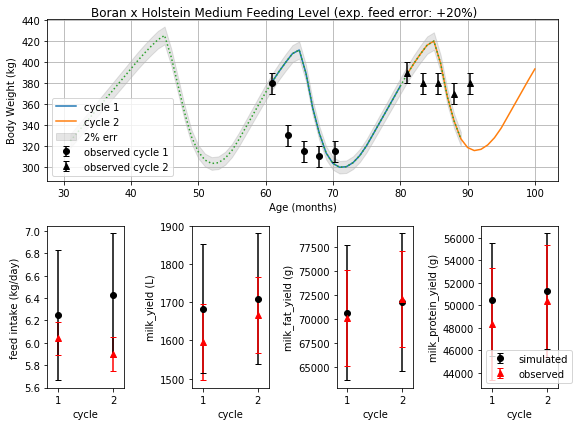

In [15]:
# make a single cow accordingly
c = Cow()
# get the default parameters which we will taylor in the next section
parameters_default = c.get_parameters()

parameters = merge_parameters(parameters_default,
                                 parameters_shared,
                                 parameters_mfl)

df = run_sim(parameters)

df_mf = df

plt_overview(df,parameters)

efe = round(100*(parameters['experimental_feeding_error']['value']-1))
title ='Boran x Holstein Medium Feeding Level (exp. feed error: +{:}%)'.format(efe)
plt.suptitle(title,y=.98)

plt.gcf().subplots_adjust(top=0.95)
plt.savefig('1 Medium Boran X Holstein.png',dpi=300)

In [16]:
estimate_experimental_feeding_error(parameters,feed_mix,bw=380)

Target ME/day: 48.38222222222222
Amount Fed kg/day: 6.04
Feed ME/kg DM: 10.09
Supplied ME/day: 60.943599999999996


1.2596279625206688

# Low Feeding Level

In [17]:
parameters_lfl = yaml.load(
    '''
    initial_age:
        value: 26
        unit: month
    initial_bodyweight:
        value: 287
        unit: kg
        
    feeding_level:
        value: 1.0
        unit: 1
        
    # See [1]: the feeding level was estimated to be 1.1 to 1.2 rather than 1.0
    experimental_feeding_error:
        value: 1.25
        unit: 1

    ###################

    # See [1]: 42.2 (33) g/kg for first 13 weeks of cycle 1 (2)
    milk_butterfat_content:
        value: 38
        unit: g/kg
        
    # See [1]: 29 (27.5) g/kg for first 13 weeks of cycle 1 (2)
    milk_crude_protein_content:
        value: 28
        unit: g/kg
    
    # 403 (455) days cycle 1 (2)
    lactation_duration:
        value: 13
        unit: month
        
    calving_interval:
        value: 19
        unit: month

    ###################

    cycle_1:
        feed_intake:
            value: 4.87
            unit: kg/day
        body_weight:
            value: [[0,340],[10,305],[20,295],[30,302],[40,308]]
            unit: [cycle week,kg]
        milk_yield:
            value: 1362
            unit: L
            err: 100
        milk_fat_yield: 
            value: 62700
            unit: g
            err: 5000
        milk_protein_yield:
            value: 42500
            unit: g
            err: 5000
    cycle_2:
        feed_intake:
            value : 5.1
            unit: kg/day
        body_weight:
            value: [[0,335],[10,310],[20,310],[30,315],[40,340]]
            unit: [cycle week,kg]
        milk_yield:    
            value: 1788
            unit: L
            err: 100
        milk_fat_yield: 
            value: 81300
            unit: g
            err: 5000
        milk_protein_yield:
            value: 54800
            unit: g
            err: 5000
    ''')

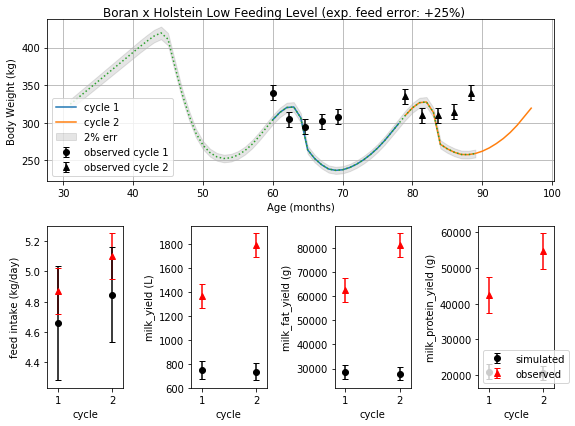

In [18]:
# make a single cow accordingly
c = Cow()
# get the default parameters which we will taylor in the next section
parameters_default = c.get_parameters()

parameters = merge_parameters(parameters_default,
                                 parameters_shared,
                                 parameters_lfl)

df = run_sim(parameters)

df_mf = df

plt_overview(df,parameters)

efe = round(100*(parameters['experimental_feeding_error']['value']-1))
title ='Boran x Holstein Low Feeding Level (exp. feed error: +{:}%)'.format(efe)
plt.suptitle(title,y=.98)
plt.gcf().subplots_adjust(top=0.95)
plt.savefig('1 Low Boran X Holstein.png',dpi=300)

In [19]:
estimate_experimental_feeding_error(parameters,feed_mix,bw=340)

Target ME/day: 36.94814814814815
Amount Fed kg/day: 4.87
Feed ME/kg DM: 10.09
Supplied ME/day: 49.1383


1.329925922213312

# Boran

In [20]:
parameters_shared_b = yaml.load('''
    peak_milk_production:
        value: 4
        unit: kg/day
        
    peak_milk_production_duration:
        value: 2
        unit: month
        
    calf_birthweight:
        value: 20
        unit: kg
    
    # Eyed from [2], appendix 2.1, fig. A5:
    # weight range for female cross-bred HosteilFreisian X Zebu
    # then ADAPTED AD HOC (lowered)
    
    maximum_body_weight:
        value: [[0, 60], [20, 300], [40, 420], [80, 420]]
        unit: [month,kg]

    minimum_body_weight:
        value: [[0, 20], [20, 80], [40, 120], [80, 200], [140, 220], [180, 220]]
        unit: [month,kg]
    
    ##############
    
    milk_body_condition_effect:
        value: [[0,0],[0.7,1],[1,1]]
        unit: [condition index, effect]
            
    # See [1]: animals held in a pen at all times
    body_changes_per_day:
        value: 10
        unit: 1
    horizontal_movement_per_day:
        value: 0
        unit: meter
    vertical_movement_per_day:
        value: 0
        unit: meter
        
''')

In [21]:
parameters_hflb = yaml.load(
    '''
    
    initial_age:
        value: 26
        unit: month
        
    initial_bodyweight:
        value: 287
        unit: kg
        
    feeding_level:
        value: 1.4
        unit: 1
        
    # See [1]: the feeding level was estimated to be 1.1 to 1.2 rather than 1.0
    experimental_feeding_error:
        value: 1.05
        unit: 1

    ###################

    # See [1]: 57.3 (47.3) g/kg for first 13 weeks of cycle 1 (2)
    milk_butterfat_content:
        value: 53
        unit: g/kg
        
    # See [1]: 32.9 (38.8) g/kg for first 13 weeks of cycle 1 (2)
    milk_crude_protein_content:
        value: 35
        unit: g/kg
    
    # 403 (455) days cycle 1 (2)
    lactation_duration:
        value: 7
        unit: month
        
    calving_interval:
        value: 20
        unit: month

    ###################

    cycle_1:
        feed_intake:
            value: 7.08
            unit: kg/day
        body_weight:
            value: [[0,360],[10,320],[20,320],[30,330],[40,340]]
            unit: [cycle week,kg]
        milk_yield:
            value: 586
            unit: L
            err: 50
        milk_fat_yield: 
            value: 29500
            unit: g
            err: 5000
        milk_protein_yield:
            value: 19600
            unit: g
            err: 2000
    cycle_2:
        feed_intake:
            value : 7.48
            unit: kg/day
        body_weight:
            value: [[0,375],[10,370],[20,370],[30,375],[40,390]]
            unit: [cycle week,kg]
        milk_yield:    
            value: 553
            unit: L
            err: 50
        milk_fat_yield: 
            value: 30100
            unit: g
            err: 2000
        milk_protein_yield:
            value: 18300
            unit: g
            err: 2000
    ''')

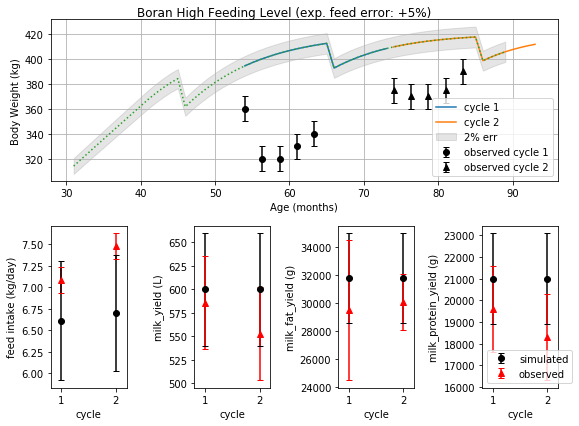

In [22]:
# make a single cow accordingly
c = Cow()
# get the default parameters which we will taylor in the next section
parameters_default = c.get_parameters()

parameters = merge_parameters(parameters_default,
                                 parameters_shared_b,
                                 parameters_hflb)

df = run_sim(parameters)

plt_overview(df,parameters)

efe = round(100*(parameters['experimental_feeding_error']['value']-1))
title ='Boran High Feeding Level (exp. feed error: +{:}%)'.format(efe)
plt.suptitle(title,y=.98)

plt.gcf().subplots_adjust(top=0.95)
plt.savefig('2 High Boran.png',dpi=300)

In [23]:
parameters_mflb = yaml.load(
    '''
    
    initial_age:
        value: 26
        unit: month
        
    initial_bodyweight:
        value: 287
        unit: kg
        
    feeding_level:
        value: 1.2
        unit: 1
        
    # See [1]: the feeding level was estimated to be 1.1 to 1.2 rather than 1.0
    experimental_feeding_error:
        value: 1.05
        unit: 1

    ###################

    # See [1]: 61.9 (41.9) g/kg for first 13 weeks of cycle 1 (2)
    milk_butterfat_content:
        value: 53
        unit: g/kg
        
    # See [1]: 33.3 (37.4) g/kg for first 13 weeks of cycle 1 (2)
    milk_crude_protein_content:
        value: 35
        unit: g/kg
    
    # 256 (185) days cycle 1 (2)
    lactation_duration:
        value: 8
        unit: month
    
    # 475 (395) days
    calving_interval:
        value: 15
        unit: month

    ###################

    cycle_1:
        feed_intake:
            value: 5.66
            unit: kg/day
        body_weight:
            value: [[0,350],[10,305],[20,290],[30,285],[40,300]]
            unit: [cycle week,kg]
        milk_yield:
            value: 647
            unit: L
            err: 50
        milk_fat_yield: 
            value: 37600
            unit: g
            err: 5000
        milk_protein_yield:
            value: 21500
            unit: g
            err: 2000
    cycle_2:
        feed_intake:
            value : 5.80
            unit: kg/day
        body_weight:
            value: [[0,320],[10,290],[20,300],[30,310],[40,330]]
            unit: [cycle week,kg]
        milk_yield:    
            value: 656
            unit: L
            err: 50
        milk_fat_yield: 
            value: 33700
            unit: g
            err: 2000
        milk_protein_yield:
            value: 24200
            unit: g
            err: 2000
    ''')

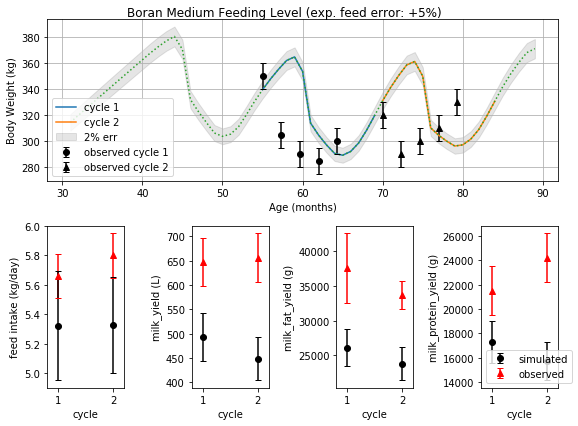

In [24]:
# make a single cow accordingly
c = Cow()
# get the default parameters which we will taylor in the next section
parameters_default = c.get_parameters()

parameters = merge_parameters(parameters_default,
                                 parameters_shared_b,
                                 parameters_mflb)

df = run_sim(parameters)

plt_overview(df,parameters)

efe = round(100*(parameters['experimental_feeding_error']['value']-1))
title ='Boran Medium Feeding Level (exp. feed error: +{:}%)'.format(efe)
plt.suptitle(title,y=.98)

plt.gcf().subplots_adjust(top=0.95)
plt.savefig('2 Medium Boran.png',dpi=300)

In [25]:
parameters_lflb = yaml.load(
    '''
    
    initial_age:
        value: 26
        unit: month
        
    initial_bodyweight:
        value: 287
        unit: kg
        
    feeding_level:
        value: 1.0
        unit: 1
        
    # See [1]: the feeding level was estimated to be 1.1 to 1.2 rather than 1.0
    experimental_feeding_error:
        value: 1.17
        unit: 1

    ###################

    # See [1]: 56.4 (53.2) g/kg for first 13 weeks of cycle 1 (2)
    milk_butterfat_content:
        value: 54
        unit: g/kg
        
    # See [1]: 32.0 (36.3) g/kg for first 13 weeks of cycle 1 (2)
    milk_crude_protein_content:
        value: 34
        unit: g/kg
    
    # 265 (156) days cycle 1 (2)
    lactation_duration:
        value: 8
        unit: month
    
    # 525 (382) days
    calving_interval:
        value: 17
        unit: month

    ###################

    cycle_1:
        feed_intake:
            value: 4.73
            unit: kg/day
        body_weight:
            value: [[0,330],[10,295],[20,280],[30,272],[40,295]]
            unit: [cycle week,kg]
        milk_yield:
            value: 485
            unit: L
            err: 50
        milk_fat_yield: 
            value: 28400
            unit: g
            err: 5000
        milk_protein_yield:
            value: 16500
            unit: g
            err: 2000
    cycle_2:
        feed_intake:
            value : 4.86
            unit: kg/day
        body_weight:
            value: [[0,320],[10,300],[20,308],[30,318],[40,340]]
            unit: [cycle week,kg]
        milk_yield:    
            value: 369
            unit: L
            err: 50
        milk_fat_yield: 
            value: 21200
            unit: g
            err: 2000
        milk_protein_yield:
            value: 12700
            unit: g
            err: 2000
    ''')

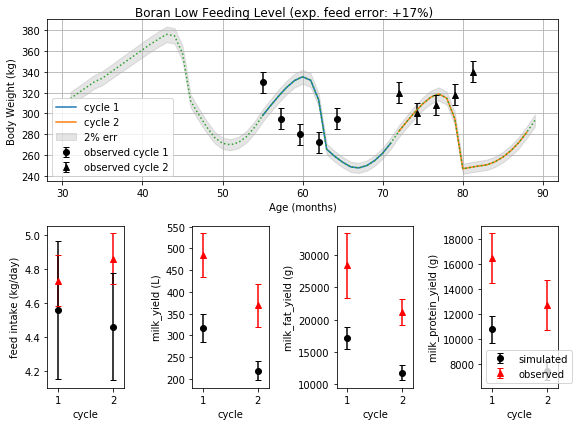

In [26]:
# make a single cow accordingly
c = Cow()
# get the default parameters which we will taylor in the next section
parameters_default = c.get_parameters()

parameters = merge_parameters(parameters_default,
                                 parameters_shared_b,
                                 parameters_lflb)

df = run_sim(parameters)

plt_overview(df,parameters)

efe = round(100*(parameters['experimental_feeding_error']['value']-1))

title ='Boran Low Feeding Level (exp. feed error: +{:}%)'.format(efe)

plt.suptitle(title,y=.98)
plt.gcf().subplots_adjust(top=0.95)
plt.savefig('2 Low Boran.png',dpi=300)